# Classwork 8: Nonparametric Regression

The goal of this assignment is to work with nonparametric regression models in R.

## Problem #1

#### (a) Simulate $n = 150$ ($x,y)$ pairs in the following way: let $x$ be random uniform numbers between zero and $\pi/2$.  Let $y_i = \sin(\pi x_i) + \varepsilon_i, \,\,\, \varepsilon_i \sim N(0, 0.5^2)$.  Plot $y$ as a function of $x$. Would a linear parametric model do well in explanation/prediction for this dataset? 

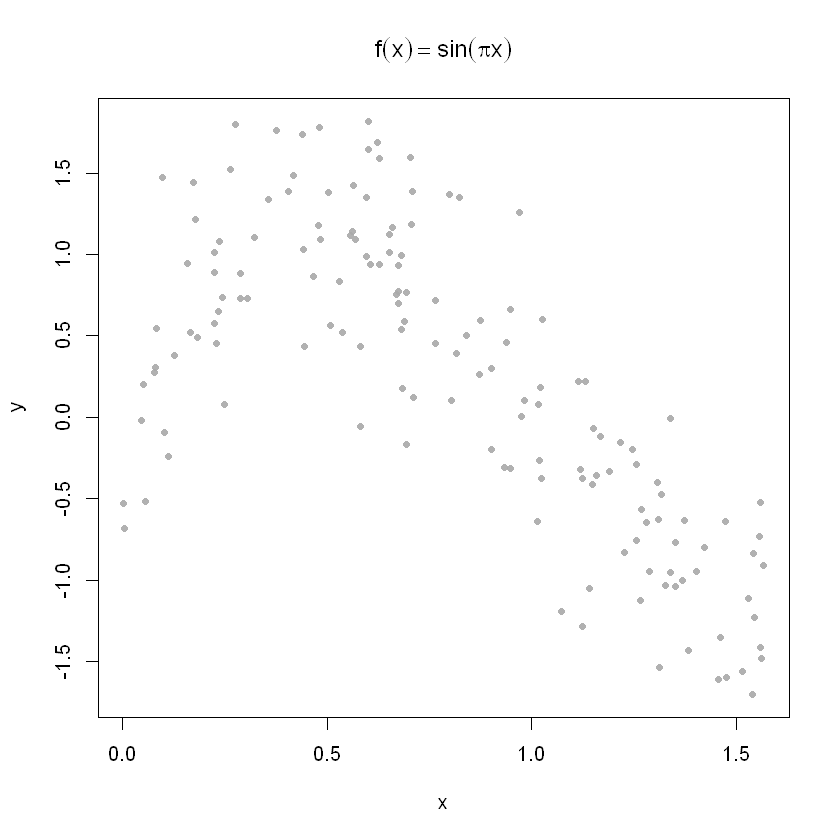

In [1]:
set.seed(88888)
library(ggplot2)
n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) 
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, cex=0.8, col = alpha("darkgrey", 0.9))


#### (b) Use the ksmooth() function to plot some kernel estimators of the unknown function $Y = f(x)$. Explore different possibilities for kernel functions (e.g., box/uniform, Gaussian/normal), and different bandwidths. Which combination gives the best fit?

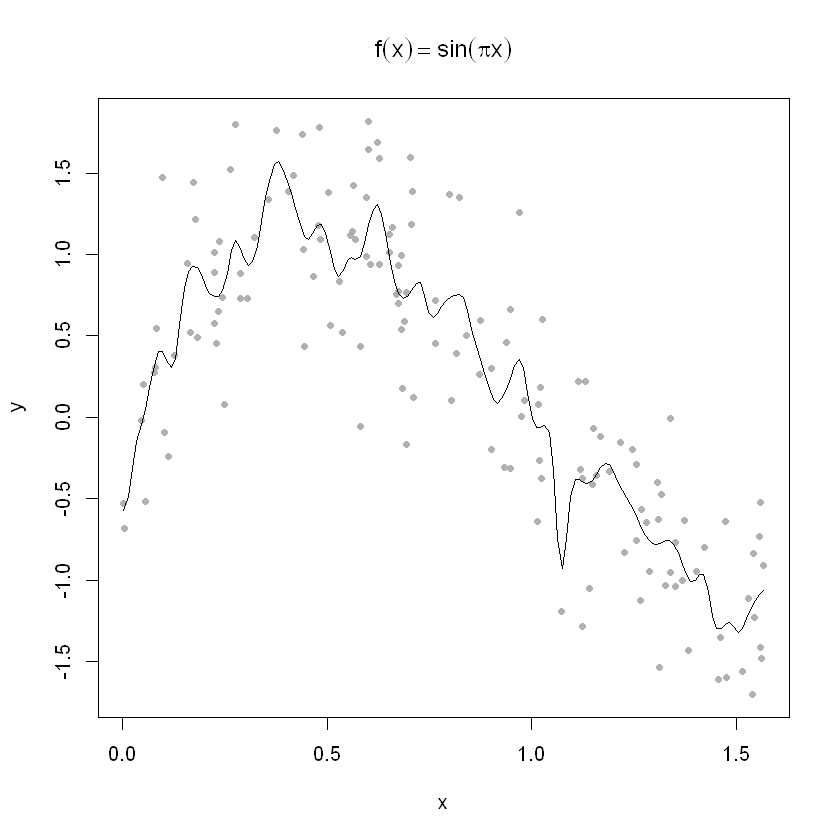

In [6]:
# 1) Code Here
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, cex=0.8, col = alpha("darkgrey", 0.9))
lines(ksmooth(x,y,'normal',0.05))

#### (c) Write your own function that replicates ksmooth. That is, write a kernel smoother function that takes in the $(x,y)$ pairs and a value for $\lambda$,  and returns a vector of values for $\widehat f$. Then, plot your kernel smooth over the simulated data from the previous parts.

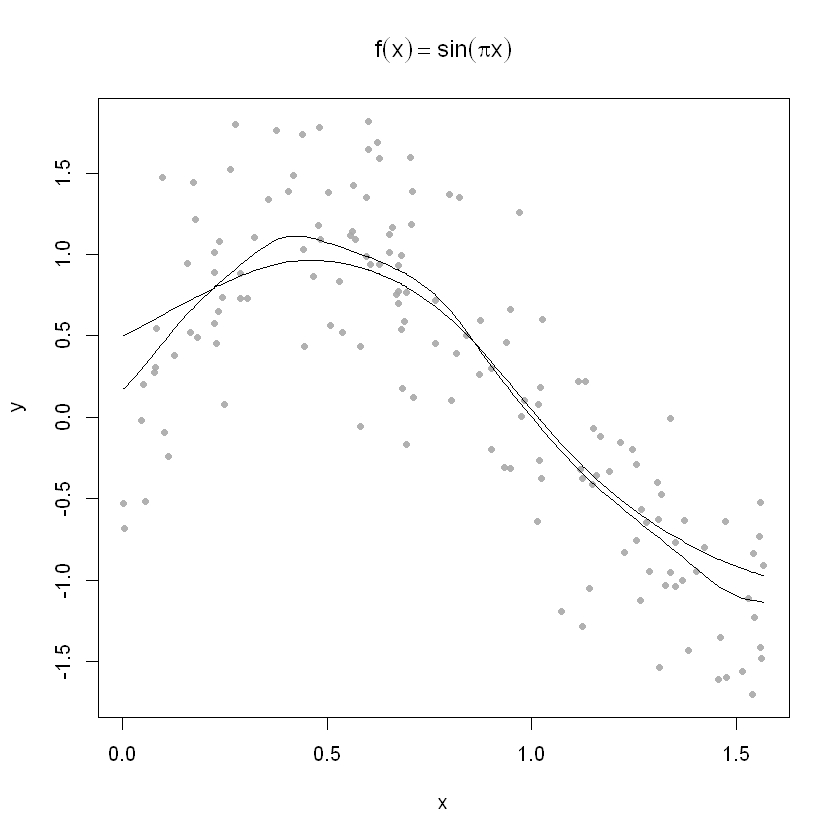

In [8]:
# 2) Code Here
smooth = function(x,y,lambda){
    f = matrix(NA,ncol=1,nrow=length(x))
    for(i in 1:length(x)){
        f[i] = sum(dnorm((x-x[i])/lambda)*y)/sum(dnorm((x-x[i])/lambda))
    }
    s = data.frame(x[order(x)],f[order(x)])
    return(s)
                                                 
}

s1 = smooth(x,y,0.1)
s2 = smooth(x,y,0.2)

plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, cex=0.8, col = alpha("darkgrey", 0.9))

lines(s1$x,s1$f,type='l')
lines(s2$x,s2$f,type='l')


## Problem #2

#### Using the dataset from above, construct a smoothing spline estimator of $f(x)$. 

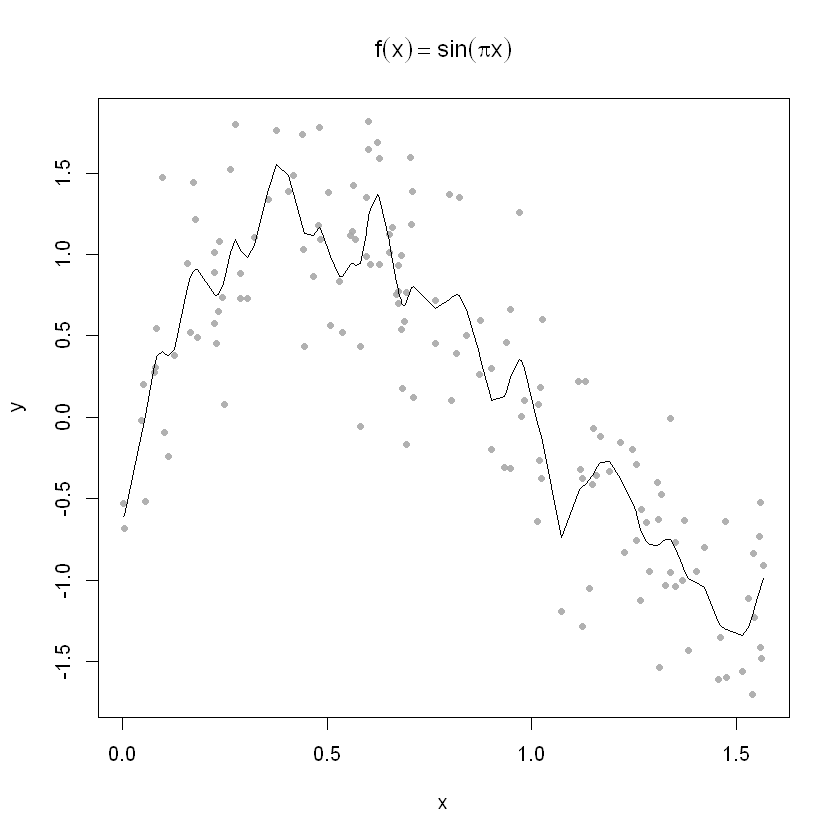

In [9]:
# 3) Code Here
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, cex=0.8, col = alpha("darkgrey", 0.9))
lines(smooth.spline(x,y,spar=0.5))

Implementing the Loess fit in R:

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


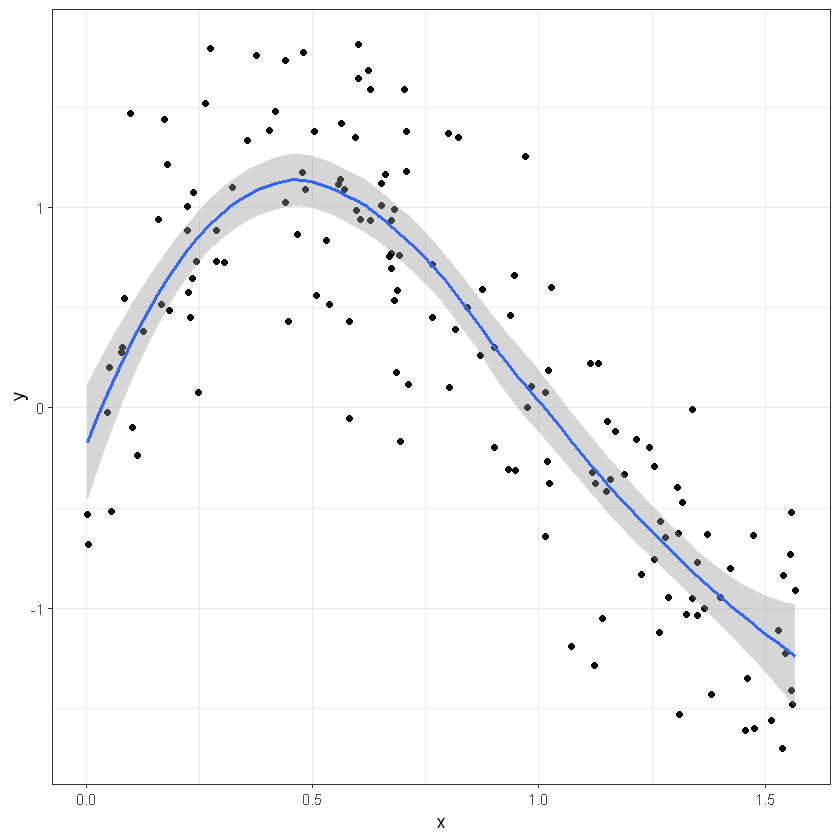

In [10]:
# 4) Code Here
library(ggplot2)

df = data.frame(x,y)
ggplot(df,aes(x=x,y=y))+
geom_point()+
geom_smooth()+
theme_bw()


### Problem 3

**PART A:** Load the following package and data set.

This data set consists of the savings data frame has 50 rows and 5 columns. The data is averaged over the period 1960-1970.

This data frame contains the following columns:

- `sr`: savings rate - personal saving divided by disposable income
- `pop15`: percent population under age of 15
- `pop75`: percent population over age of 75
- `dpi`: per-capita disposable income in dollars
- `ddpi`: percent growth rate of dpi

Note that this example comes straight from our textbook: "Extending the Linear Model" (Chapter 14 - page 315)

In [13]:
# install.packages("faraway")
library(faraway)
data(savings, package="faraway")

Next, we install the `sm` library. The `sm` package is for "Smoothing Methods for Nonparametric Regression and Density Estimation"

In [14]:
# install.packages("sm")
library(sm)

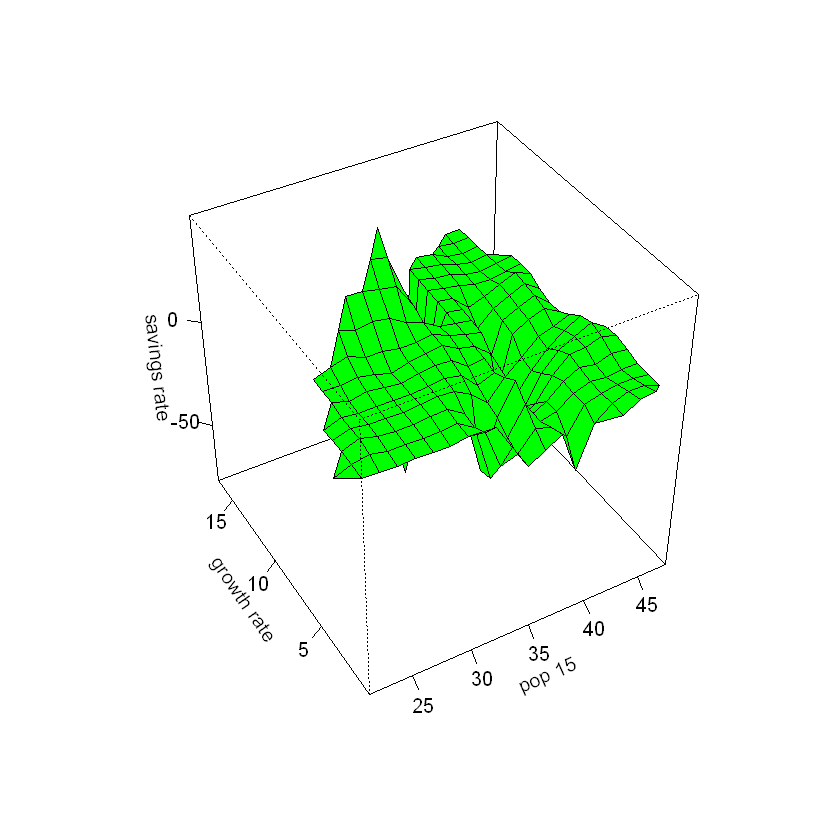

In [16]:
# 5) Code Here
y = savings$sr

x = cbind(savings$pop15,savings$ddpi)

sm.regression(x,y,h=c(1,1),xlab='pop 15',ylab='growth rate',zlab='savings rate')

In [28]:
library(mgcv)

Next, we will produce a spline surface with the `gam()` function.

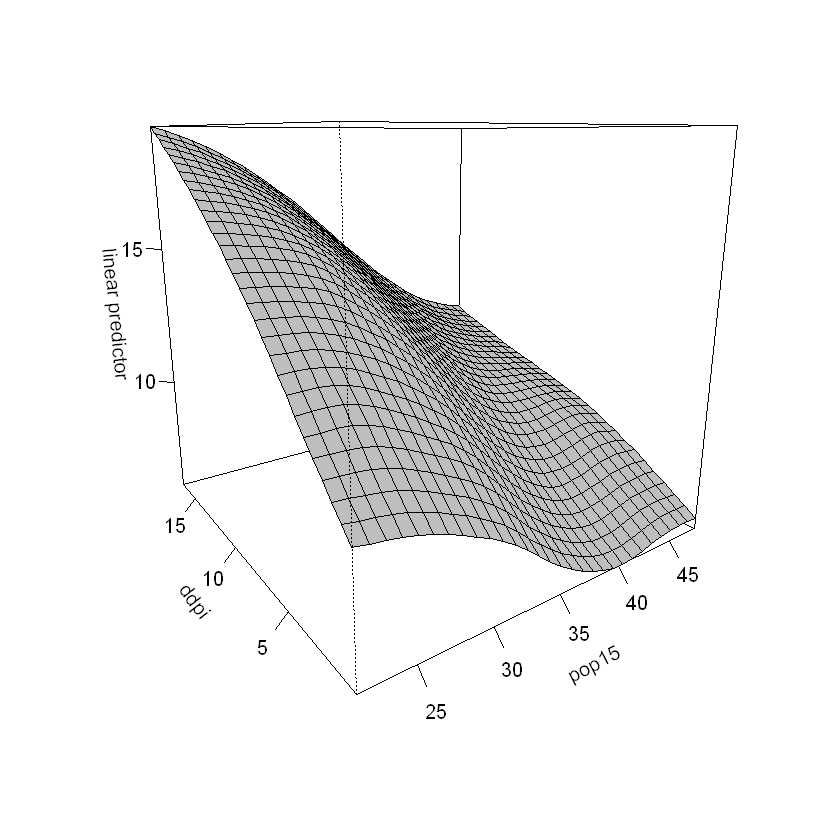

In [19]:
# 6) Code Here
amod = gam(sr~s(pop15,ddpi),data=savings)
vis.gam(amod,col='gray',ticktype='detailed',theta=-35)

Lastly, we will use `loess` smoothing. For this to work, we need to construct a 2D grid on which to compute the prediction.

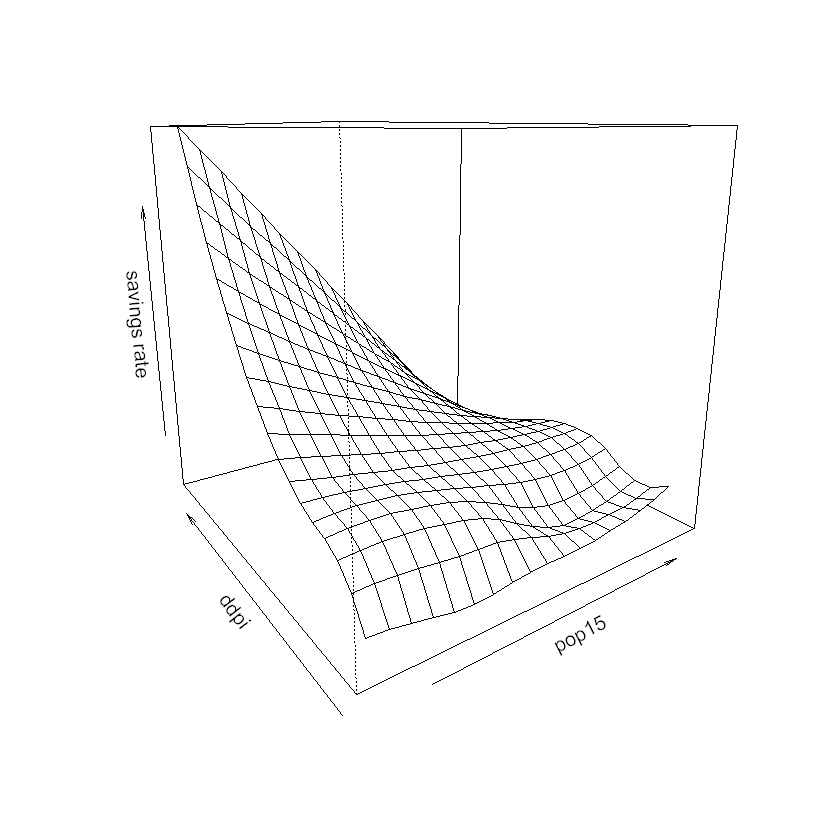

In [22]:
# 7) Code Here
lomod = loess(sr~pop15 + ddpi,data=savings)
xg = seq(21,48,len=20)
yg = seq(0,17,len=20)
zg = expand.grid(pop15=xg,ddpi=yg)

persp(xg,yg,predict(lomod,zg),theta=-35,xlab='pop15',ylab='ddpi',zlab='savings rate')

**PART B:** Now, let's repeat these fits with a different dataset.

Read in the `weatherHistory.csv` file by running the cell below.

In [23]:
library(readr)
weather_data = read_csv("weatherHistory.csv")
head(weather_data)

Warning message:
"package 'readr' was built under R version 4.4.2"
Rows: 96453 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Formatted Date, Summary, Precip, Daily Summary
dbl (7): Temperature, Apparent_Temperature, Humidity, Wind_Speed, Wind_Beari...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Formatted Date,Summary,Precip,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility(km),Pressure (millibars),Daily Summary
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.


First, use sm.regression to fit a kernel regression with `Wind_Speed` as the response and `Temperature` and `Humidity` as the predictors.

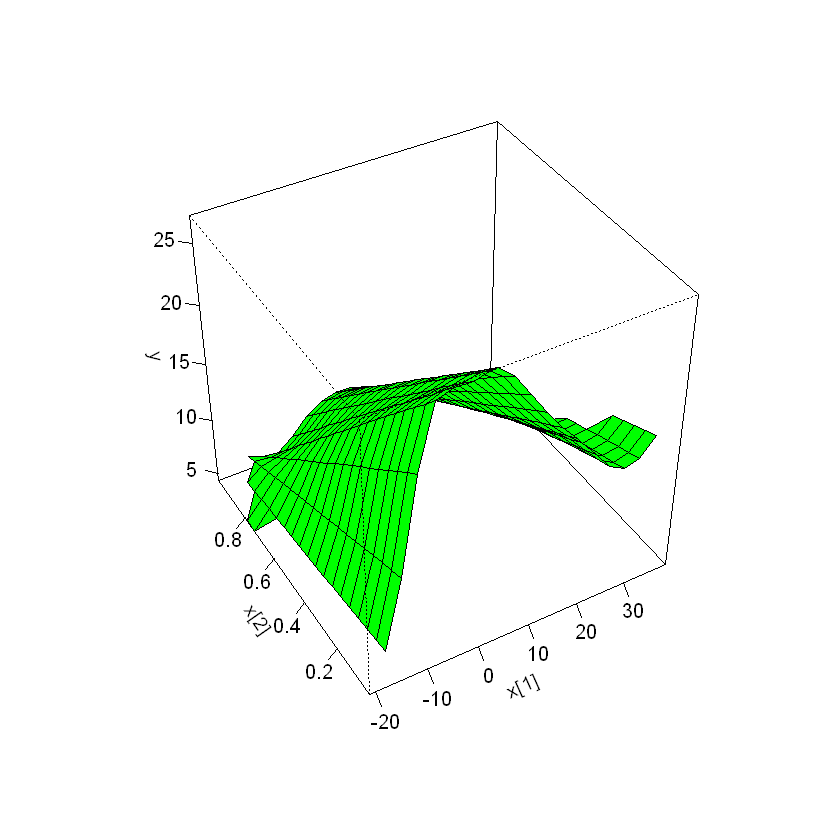

In [25]:
# 8) Code Here
y = weather_data$Wind_Speed
x = cbind(weather_data$Temperature,weather_data$Humidity)

sm.regression(x,y,h=c(3,3))

Second, use sm.regression to fit a kernel regression with `Temperature` as the response and `Wind_Speed` and `Humidity` as the predictors.

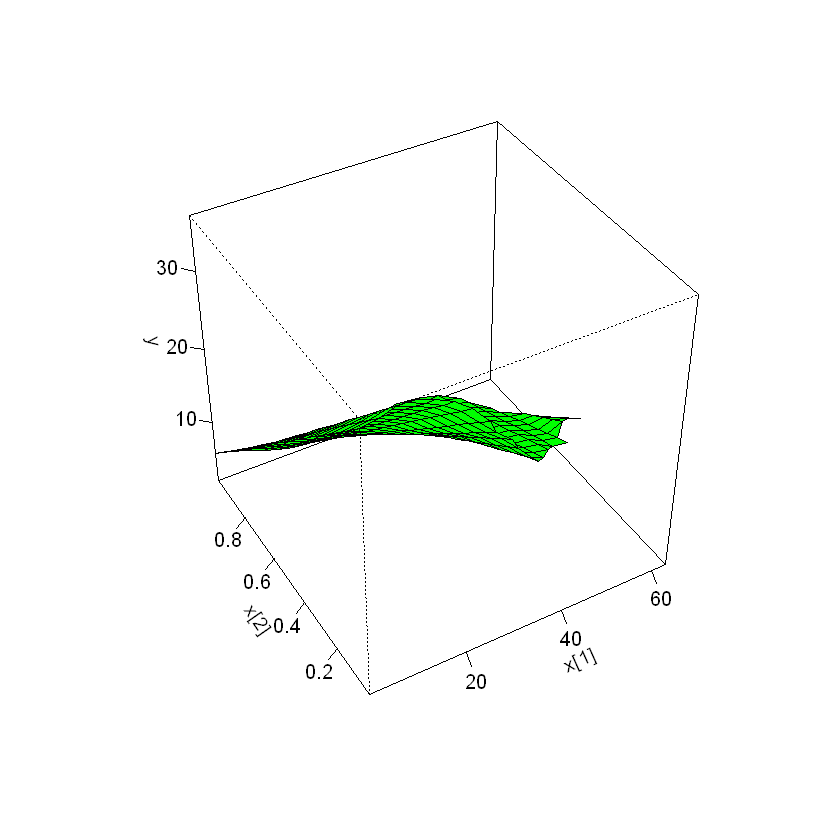

In [26]:
# 9) Code Here
y = weather_data$Temperature
x = cbind(weather_data$Wind_Speed,weather_data$Humidity)
sm.regression(x,y,h=c(3,3))

Now, use the `gam()` function to fit a spline surface fit. It's your choice for which variables to use as the predictors vs. the response.

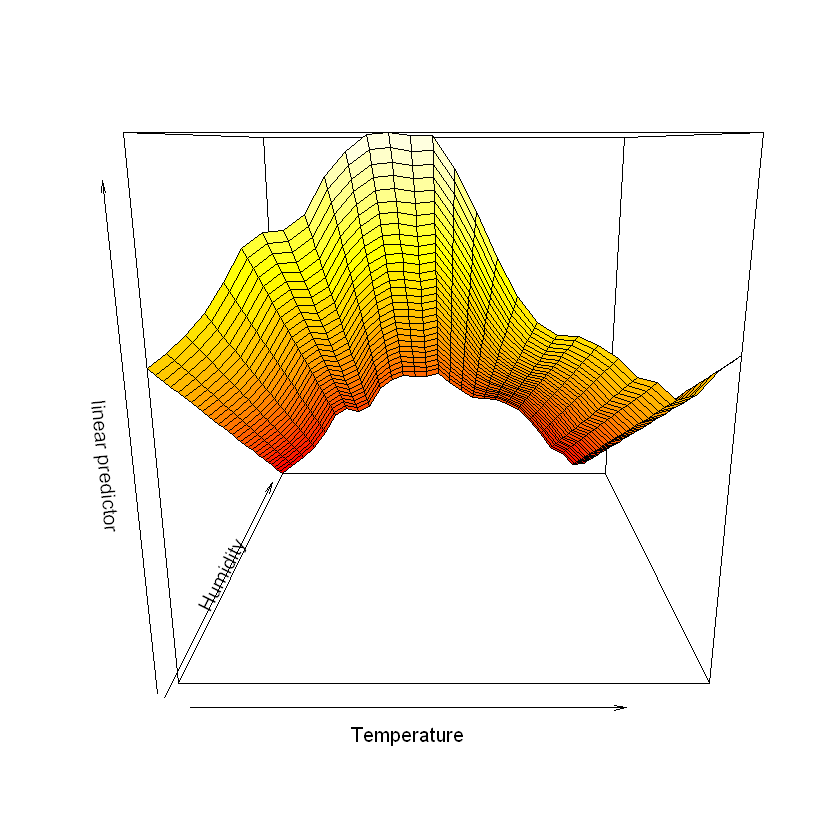

In [27]:
# 10) Code Here
weather_gam = gam(Wind_Speed ~ s(Temperature,Humidity),data=weather_data)
vis.gam(weather_gam)